In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [164]:
df = pd.read_excel('Exp4.xlsx')

In [165]:
df

,Unnamed: 0,电流I,B0,v_1_87,v_1_85,v_2_87,v_2_85,(v_1_87+v_2_87)/2,(v_1_85+v_2_85)/2
0,1,0.298,NaN,782,523,1188,793,NaN,NaN
1,2,0.255,NaN,634,423,1046,701,NaN,NaN
2,3,0.228,NaN,550,367,956,638,NaN,NaN
3,4,0.203,NaN,461,309,874,585,NaN,NaN
4,5,0.182,NaN,393,261,802,536,NaN,NaN
5,6,0.166,NaN,340,227,753,501,NaN,NaN


In [166]:
import scipy.constants


N = 250
I = df['电流I'] # A
r = 0.2373      # m（待确定）
Planck_h = scipy.constants.h
Bohr_magneton = scipy.constants.physical_constants['Bohr magneton'][0] / 1000  # in kHz

df['B0'] = (16 * np.pi / np.power(5, 3/2)) * N * I / r * 0.0000001                  # in T
B0 = df['B0']

In [167]:
df['(v_1_85+v_2_85)/2'] = (df['v_2_85'] + df['v_1_85']) / 2
df['(v_1_87+v_2_87)/2'] = (df['v_1_87'] + df['v_2_87']) / 2

In [168]:
df

,Unnamed: 0,电流I,B0,v_1_87,v_1_85,v_2_87,v_2_85,(v_1_87+v_2_87)/2,(v_1_85+v_2_85)/2
0,1,0.298,0.000141,782,523,1188,793,985.0,658.0
1,2,0.255,0.000121,634,423,1046,701,840.0,562.0
2,3,0.228,0.000108,550,367,956,638,753.0,502.5
3,4,0.203,0.000096,461,309,874,585,667.5,447.0
4,5,0.182,0.000086,393,261,802,536,597.5,398.5
5,6,0.166,0.000079,340,227,753,501,546.5,364.0


In [169]:
df['gf_85'] = df['(v_1_85+v_2_85)/2'] * Planck_h / (Bohr_magneton * df['B0'])
df['gf_87'] = df['(v_1_87+v_2_87)/2'] * Planck_h / (Bohr_magneton * df['B0'])

In [170]:
df

,Unnamed: 0,电流I,B0,v_1_87,v_1_85,v_2_87,v_2_85,(v_1_87+v_2_87)/2,(v_1_85+v_2_85)/2,gf_85,gf_87
0,1,0.298,0.000141,782,523,1188,793,985.0,658.0,0.333074,0.498599
1,2,0.255,0.000121,634,423,1046,701,840.0,562.0,0.332451,0.496902
2,3,0.228,0.000108,550,367,956,638,753.0,502.5,0.332455,0.498186
3,4,0.203,0.000096,461,309,874,585,667.5,447.0,0.332157,0.496006
4,5,0.182,0.000086,393,261,802,536,597.5,398.5,0.330285,0.495220
5,6,0.166,0.000079,340,227,753,501,546.5,364.0,0.330769,0.496608


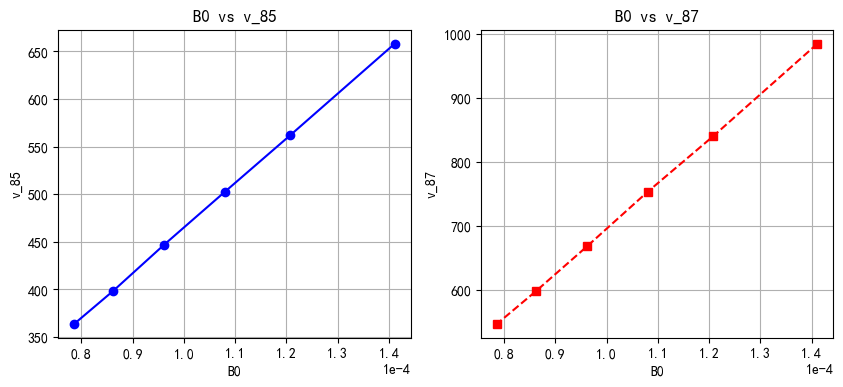

In [179]:
from matplotlib.ticker import ScalarFormatter
# 创建一个图形和两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 行 2 列的子图布局

# 在第一个子图中绘制 Y1
ax1.plot(df['B0'], df['(v_1_85+v_2_85)/2'], marker='o', linestyle='-', color='b')
ax1.set_title('B0 vs v_85')
ax1.set_xlabel('B0')
ax1.set_ylabel('v_85')
ax1.grid(True)
# 设置第一个子图的 Y 轴为科学计数法
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))


# 在第二个子图中绘制 Y2
ax2.plot(df['B0'], df['(v_1_87+v_2_87)/2'], marker='s', linestyle='--', color='r')
ax2.set_title('B0 vs v_87')
ax2.set_xlabel('B0')
ax2.set_ylabel('v_87')
ax2.grid(True)
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

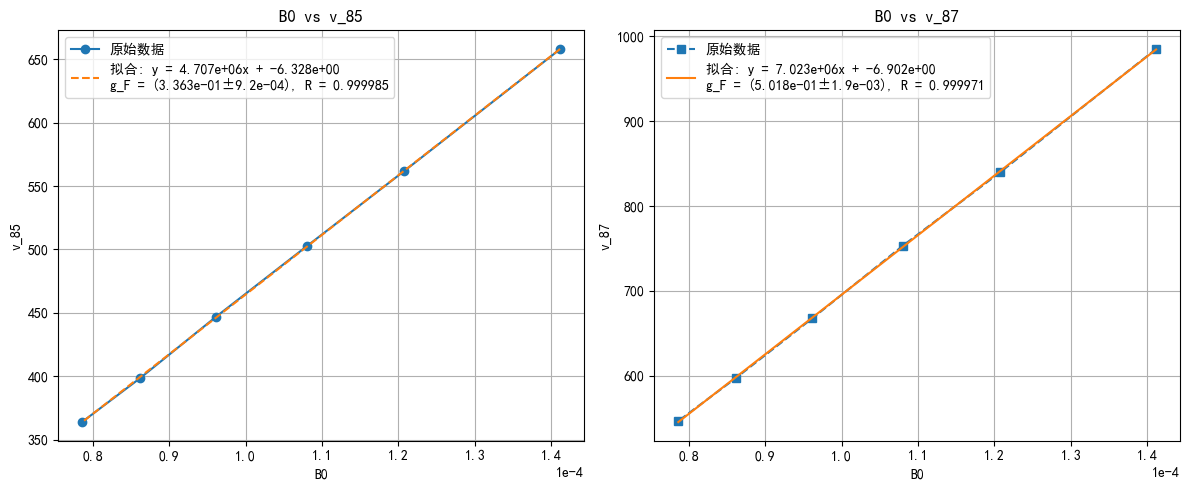

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from scipy.stats import linregress  # 新增

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号

# 创建图形和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 提取数据
B0_values = df['B0'].values
v_1_values = df['(v_1_85+v_2_85)/2'].values
v_2_values = df['(v_1_87+v_2_87)/2'].values

# 常数
k_constant = Bohr_magneton / Planck_h

# 拟合 v_1_values
coeffs1, cov1 = np.polyfit(B0_values, v_1_values, deg=1, cov=True)
slope1, intercept1 = coeffs1
slope1_err = np.sqrt(cov1[0, 0])
slope1_div = slope1 / k_constant
slope1_div_err = slope1_err / k_constant
fit_v_1_values = np.polyval(coeffs1, B0_values)
R1 = np.corrcoef(B0_values, v_1_values)[0, 1]  # 相关系数

# 拟合 v_2_values
coeffs2, cov2 = np.polyfit(B0_values, v_2_values, deg=1, cov=True)
slope2, intercept2 = coeffs2
slope2_err = np.sqrt(cov2[0, 0])
slope2_div = slope2 / k_constant
slope2_div_err = slope2_err / k_constant
fit_v_2_values = np.polyval(coeffs2, B0_values)
R2 = np.corrcoef(B0_values, v_2_values)[0, 1]

# 绘制 v_1_values 和拟合线
ax1.plot(x, v_1_values, marker='o', linestyle='-', label='原始数据')
ax1.plot(x, fit_v_1_values, linestyle='--',
         label=f'拟合: y = {slope1:.3e}x + {intercept1:.3e}\n'
               f'g_F = ({slope1_div:.3e}±{slope1_div_err:.1e}), R = {R1:.6f}')
ax1.set_title('B0 vs v_85')
ax1.set_xlabel('B0')
ax1.set_ylabel('v_85')
ax1.grid(True)
ax1.legend()
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

# 绘制 v_2_values 和拟合线
ax2.plot(B0_values, v_2_values, marker='s', linestyle='--', label='原始数据')
ax2.plot(B0_values, fit_v_2_values, linestyle='-',
         label=f'拟合: y = {slope2:.3e}x + {intercept2:.3e}\n'
               f'g_F = ({slope2_div:.3e}±{slope2_div_err:.1e}), R = {R2:.6f}')
ax2.set_title('B0 vs v_87')
ax2.set_xlabel('B0')
ax2.set_ylabel('v_87')
ax2.grid(True)
ax2.legend()
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

plt.tight_layout()
plt.show()


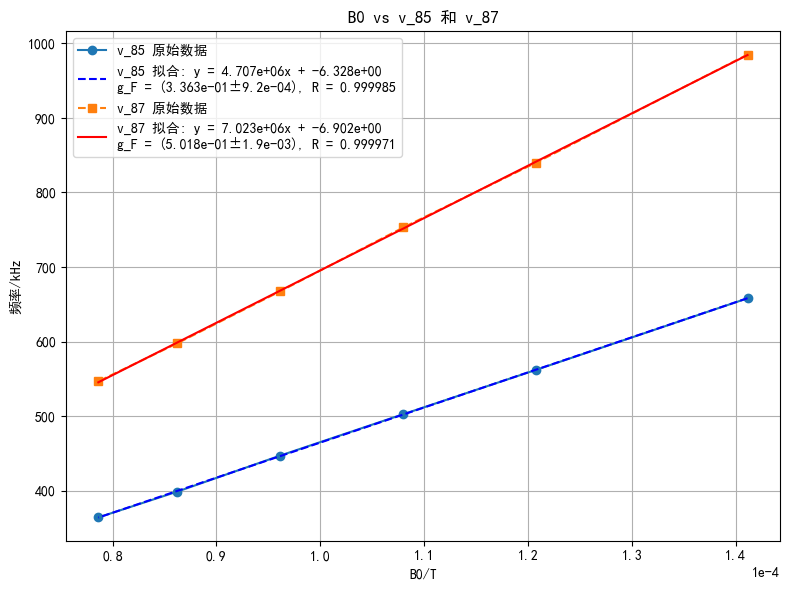

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from scipy.stats import linregress  # 可选，用于相关系数计算

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号

# 提取数据
B0_values = df['B0'].values
v_1_values = df['(v_1_85+v_2_85)/2'].values
v_2_values = df['(v_1_87+v_2_87)/2'].values

# 常数
k_constant = Bohr_magneton / Planck_h

# 拟合 v_1_values
coeffs1, cov1 = np.polyfit(B0_values, v_1_values, deg=1, cov=True)
slope1, intercept1 = coeffs1
slope1_err = np.sqrt(cov1[0, 0])
slope1_div = slope1 / k_constant
slope1_div_err = slope1_err / k_constant
fit_v_1_values = np.polyval(coeffs1, B0_values)
R1 = np.corrcoef(B0_values, v_1_values)[0, 1]  # 相关系数

# 拟合 v_2_values
coeffs2, cov2 = np.polyfit(B0_values, v_2_values, deg=1, cov=True)
slope2, intercept2 = coeffs2
slope2_err = np.sqrt(cov2[0, 0])
slope2_div = slope2 / k_constant
slope2_div_err = slope2_err / k_constant
fit_v_2_values = np.polyval(coeffs2, B0_values)
R2 = np.corrcoef(B0_values, v_2_values)[0, 1]

# 创建一个图形
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制 v_1_values 和其拟合线
ax.plot(B0_values, v_1_values, 'o-', label='v_85 原始数据')
ax.plot(B0_values, fit_v_1_values, 'b--',
        label=f'v_85 拟合: y = {slope1:.3e}x + {intercept1:.3e}\n'
              f'g_F = ({slope1_div:.3e}±{slope1_div_err:.1e}), R = {R1:.6f}')

# 绘制 v_2_values 和其拟合线
ax.plot(B0_values, v_2_values, 's--', label='v_87 原始数据')
ax.plot(B0_values, fit_v_2_values, 'r-',
        label=f'v_87 拟合: y = {slope2:.3e}x + {intercept2:.3e}\n'
              f'g_F = ({slope2_div:.3e}±{slope2_div_err:.1e}), R = {R2:.6f}')

# 设置标题和标签
ax.set_title('B0 vs v_85 和 v_87')
ax.set_xlabel('B0/T')
ax.set_ylabel('频率/kHz')
ax.grid(True)
ax.legend()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

plt.tight_layout()
plt.show()


In [183]:
latex_code = df.to_latex(index=False, 
                         caption='实验数据表', 
                         label='tab:data', 
                         longtable=True, 
                         escape=False)  # 如果有数学符号不要转义
print(latex_code)


\begin{longtable}{rrrrrrrrrrr}
\caption{实验数据表} \label{tab:data} \\
\toprule
Unnamed: 0 & 电流I & B0 & v_1_87 & v_1_85 & v_2_87 & v_2_85 & (v_1_87+v_2_87)/2 & (v_1_85+v_2_85)/2 & gf_85 & gf_87 \\
\midrule
\endfirsthead
\caption[]{实验数据表} \\
\toprule
Unnamed: 0 & 电流I & B0 & v_1_87 & v_1_85 & v_2_87 & v_2_85 & (v_1_87+v_2_87)/2 & (v_1_85+v_2_85)/2 & gf_85 & gf_87 \\
\midrule
\endhead
\midrule
\multicolumn{11}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
1 & 0.298000 & 0.000141 & 782 & 523 & 1188 & 793 & 985.000000 & 658.000000 & 0.333074 & 0.498599 \\
2 & 0.255000 & 0.000121 & 634 & 423 & 1046 & 701 & 840.000000 & 562.000000 & 0.332451 & 0.496902 \\
3 & 0.228000 & 0.000108 & 550 & 367 & 956 & 638 & 753.000000 & 502.500000 & 0.332455 & 0.498186 \\
4 & 0.203000 & 0.000096 & 461 & 309 & 874 & 585 & 667.500000 & 447.000000 & 0.332157 & 0.496006 \\
5 & 0.182000 & 0.000086 & 393 & 261 & 802 & 536 & 597.500000 & 398.500000 & 0.330285 & 0.495220 \\
6 & 0.166000 & 0.000079

C:\Users\TaLEsCuber\AppData\Local\Temp\ipykernel_107084\570427454.py:64: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) SimHei.
  plt.tight_layout()


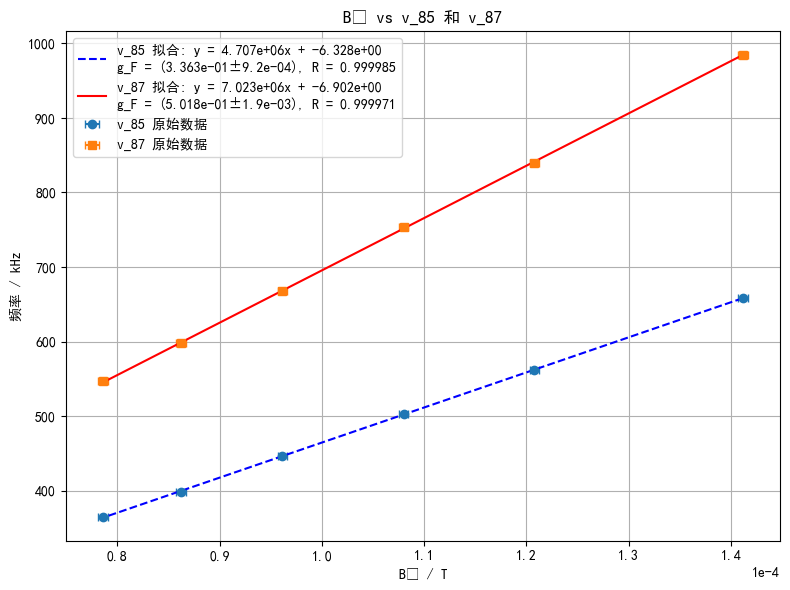

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 提取数据
B0_values = df['B0'].values
v_1_values = df['(v_1_85+v_2_85)/2'].values
v_2_values = df['(v_1_87+v_2_87)/2'].values

# 常数
k_constant = Bohr_magneton / Planck_h  # g_F = slope / k_constant

k_helmholtz = (16 * np.pi / np.power(5, 3/2)) * N / r * 0.0000001 # T/A，亥姆霍兹线圈常数

I_err = 0.001  # A，电流表误差
B0_err = np.full_like(B0_values, k_helmholtz * I_err)  # B0 不确定度

# 拟合 v_1_values
coeffs1, cov1 = np.polyfit(B0_values, v_1_values, deg=1, cov=True)
slope1, intercept1 = coeffs1
slope1_err = np.sqrt(cov1[0, 0])
slope1_div = slope1 / k_constant
slope1_div_err = slope1_err / k_constant
fit_v_1_values = np.polyval(coeffs1, B0_values)
R1 = np.corrcoef(B0_values, v_1_values)[0, 1]

# 拟合 v_2_values
coeffs2, cov2 = np.polyfit(B0_values, v_2_values, deg=1, cov=True)
slope2, intercept2 = coeffs2
slope2_err = np.sqrt(cov2[0, 0])
slope2_div = slope2 / k_constant
slope2_div_err = slope2_err / k_constant
fit_v_2_values = np.polyval(coeffs2, B0_values)
R2 = np.corrcoef(B0_values, v_2_values)[0, 1]

# 创建图形
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制 v_1 数据和误差棒
ax.errorbar(B0_values, v_1_values, xerr=B0_err, fmt='o', label='v_85 原始数据', capsize=3)
ax.plot(B0_values, fit_v_1_values, 'b--',
        label=f'v_85 拟合: y = {slope1:.3e}x + {intercept1:.3e}\n'
              f'g_F = ({slope1_div:.3e}±{slope1_div_err:.1e}), R = {R1:.6f}')

# 绘制 v_2 数据和误差棒
ax.errorbar(B0_values, v_2_values, xerr=B0_err, fmt='s', label='v_87 原始数据', capsize=3)
ax.plot(B0_values, fit_v_2_values, 'r-',
        label=f'v_87 拟合: y = {slope2:.3e}x + {intercept2:.3e}\n'
              f'g_F = ({slope2_div:.3e}±{slope2_div_err:.1e}), R = {R2:.6f}')

# 设置标题和标签
ax.set_title('B₀ vs v_85 和 v_87')
ax.set_xlabel('B₀ / T')
ax.set_ylabel('频率 / kHz')
ax.grid(True)
ax.legend()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

plt.tight_layout()
plt.show()
